In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
# Чтение файла и формирование датафрейма
churn_data = pd.read_csv('data/churn.zip')
churn_data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [3]:
# Удалим колонку RowNumber — номер строки таблицы, несет ненужную информацию.
churn_data.drop('RowNumber', axis=1, inplace=True)

In [4]:
# Информация о датафрейме
churn_data.info()
# 13 колонок, 10_000 строк. 3 переменных типа object и 10 числовых. Нет пропущенных значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

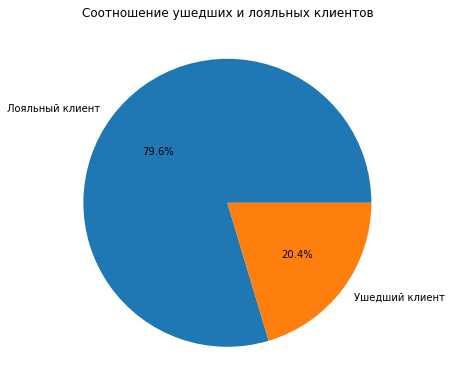

In [5]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    labels=['Лояльный клиент', 'Ушедший клиент'],
    autopct='%.1f%%'
)
axes.set_title('Соотношение ушедших и лояльных клиентов')
plt.show()

Доля лояльных клиентов примерно 80% датасета. Она превалирует над долей ушедших клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

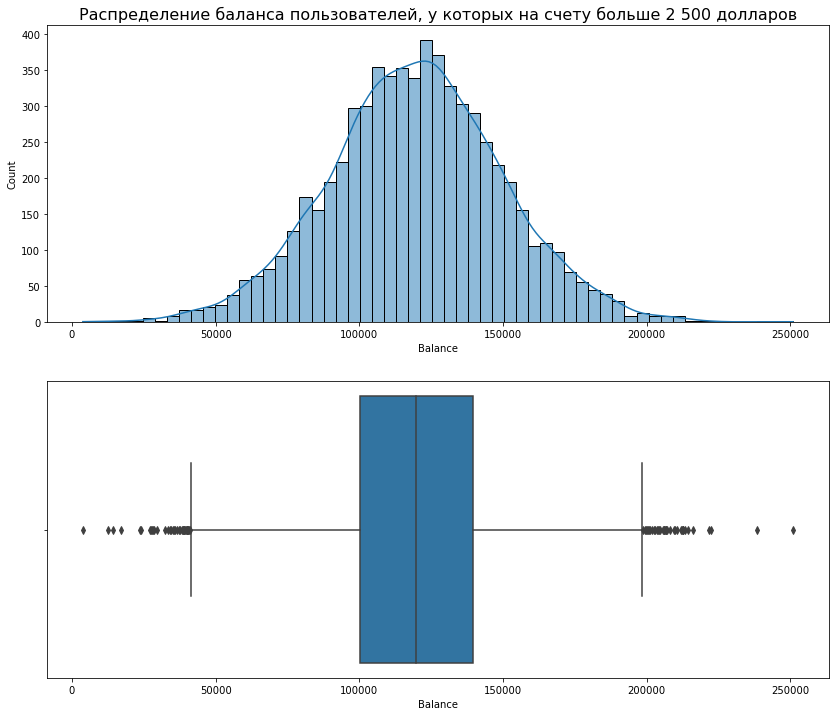

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=16)
sns.boxplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes[1]
)
plt.show()

In [7]:
churn_data[churn_data['Balance'] > 2500]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

Распределение нормальное. Межквартильный размах примено 40 тыс. долларов (примерно 140-100). Медиана и среднее (примерно 120 тыс. долларов) близки по значениям друг к другу, таким образом перекосов в большую или меньшую сторону нет. 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

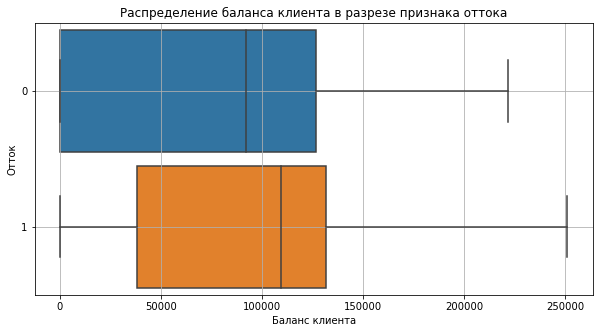

In [8]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.9,
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс клиента');
boxplot.set_ylabel('Отток');
boxplot.grid()
plt.show()

Суммы на накопительном счёте ушедших и лояльных клиентов различаются. Баланс ушедших клиентов по медиане больше, чем лояльных. Разброс по сумме баланса у лояльных клиентов больше и ближе к нулю, нежели разброс ушедших клиентов.  
Не устраивать клиентов в банке могут продукты с недостаточным количеством возможностей, низкие процентные ставки, высокая стоимость обслуживания, неудобство оффлайн и онлайн обслуживания.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

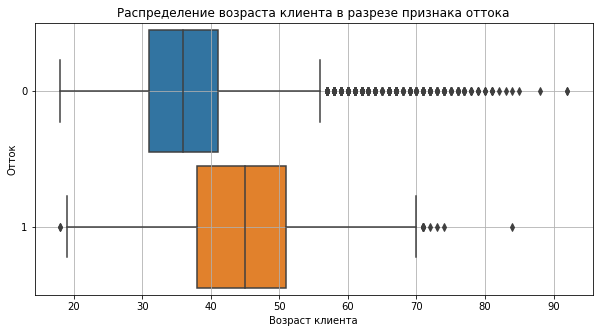

In [9]:
fig = plt.figure(figsize=(10, 5))
boxplot1 = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9,
)
boxplot1.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot1.set_xlabel('Возраст клиента');
boxplot1.set_ylabel('Отток');
boxplot1.grid()
plt.show()

В группе лояльных клиентов больше потенциальных выбросов. На возрастную категорию 40-50 стоит обратить внимание банку.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

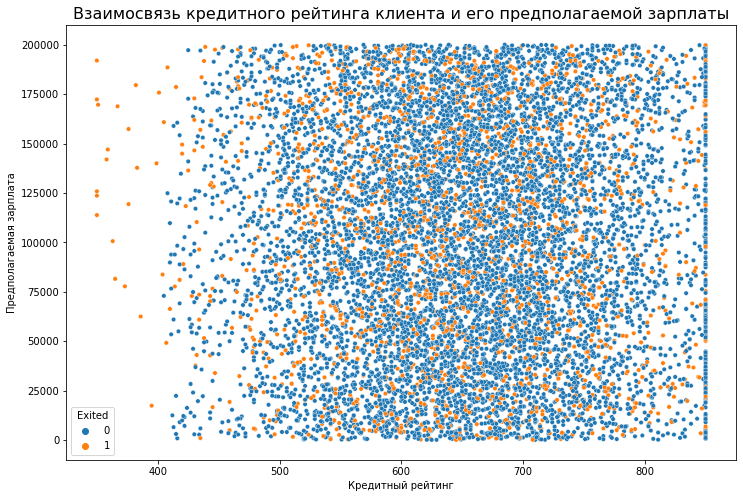

In [10]:
fig = plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=20
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата')
plt.show()

Взаимосвязи между признаками явной нет, но стоит заметить, что у некоторых ушедших клиентов кредитный рейтинг ниже 400, у лояльных клиентов рейтинга ниже 400 нет.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

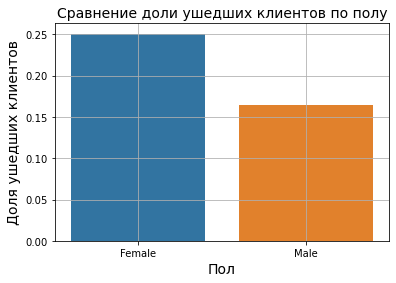

In [11]:
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited',
    ci= None,
    orient='v'
)
barplot.set_title('Сравнение доли ушедших клиентов по полу', fontsize=14);
barplot.set_xlabel('Пол', fontsize=14);
barplot.set_ylabel('Доля ушедших клиентов', fontsize=14);
barplot.grid()

Чаще уходят женщины

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [12]:
pivot_num = pd.crosstab(index=churn_data['NumOfProducts'], columns=churn_data['Exited'], 
                        values=churn_data['NumOfProducts'], aggfunc='count', normalize='index')
pivot_num

Exited                0         1
NumOfProducts                    
1              0.722856  0.277144
2              0.924183  0.075817
3              0.172932  0.827068
4              0.000000  1.000000

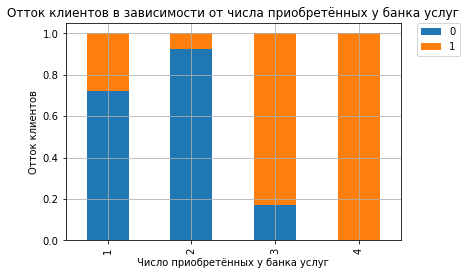

In [13]:
pivot_num.plot(
    kind='bar',
    stacked=True,
    title='Отток клиентов в зависимости от числа приобретённых у банка услуг',
    xlabel='Число приобретённых у банка услуг',
    ylabel='Отток клиентов'
)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()

До трех приобретенных услуг (включительно) наблюдается у лояльных клиентов. Те, кто приобретает до 4-х услуг перестают быть клиентами банка. С 3-х услуг увеличение оттока клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [14]:
pivot_status = pd.crosstab(index=churn_data['IsActiveMember'], columns=churn_data['Exited'], 
                        values=churn_data['IsActiveMember'], aggfunc='count', normalize='index')
pivot_status

Exited                 0         1
IsActiveMember                    
0               0.731491  0.268509
1               0.857309  0.142691

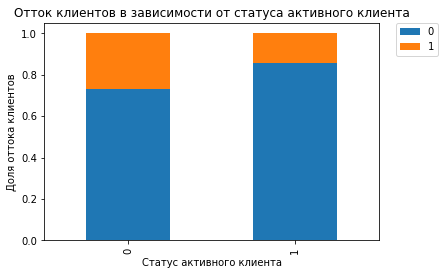

In [15]:
pivot_status.plot(
    kind='bar',
    stacked=True,
    title='Отток клиентов в зависимости от статуса активного клиента',
    xlabel='Статус активного клиента',
    ylabel='Доля оттока клиентов'
)
plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left', borderaxespad=0)
plt.show()

У группы клиентов, у которых нет статуса активного клиента, отток выше, чем у группы клиентов, у которых статус активного клиента есть. Возможно, стоит обратить внимание на условия вступления в группу активных клиентов. Также могут не устраивать клиентов в банке продукты из-за недостаточного количества возможностей. Начиная с 3-х услуг отток клиентов увеличивается, нужно проработать возможности, качество услуг. Возможно усилить продукты и дать больше возможностей клиентам со статусом активного клиента.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [16]:
country_data = churn_data.groupby('Geography')['Exited'].mean().reset_index()
country_data

Geography    Exited
0    France  0.161548
1   Germany  0.324432
2     Spain  0.166734

In [17]:
fig = px.choropleth(
    data_frame=country_data,
    locations='Geography',
    locationmode = 'country names',
    color='Exited',
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

In [18]:
fig.write_html('img/choropleth.html')

В Германии доля ушедших клиентов больше. Возможно не устраивает больше качество и возможности услуг, неоточенное обслуживание клиентов. Также может зависеть от экономического состояния страны-большой отток промышленных предприятий.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.  
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.  
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [20]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [21]:
pivot_data = pd.pivot_table(data=churn_data, index='CreditScoreCat', columns='Tenure', 
                            values='Exited', aggfunc='mean')
pivot_data

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

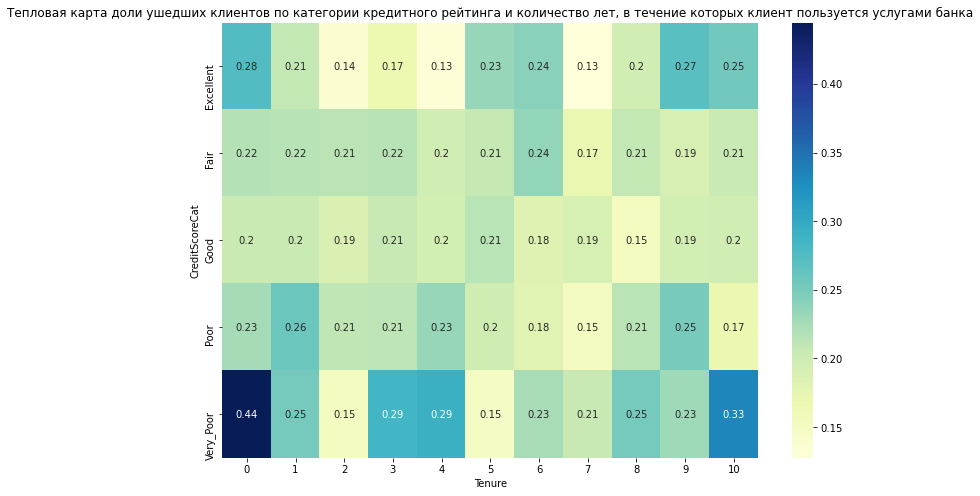

In [22]:
fig = plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data=pivot_data, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта доли ушедших клиентов по категории кредитного рейтинга и \
количество лет, в течение которых клиент пользуется услугами банка')
plt.show()

Чаще всего уходят клиенты с категорией Very_Poor и Excellent, те, кто либо недавний клиент банка или пользующийся услугами около 10 лет.